D:\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\anaconda3\envs\tensorflow\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


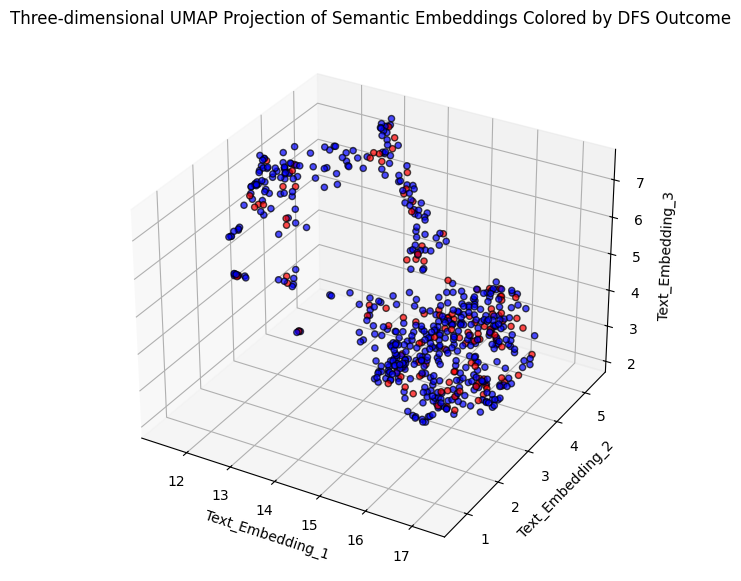

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 用于3D绘图

# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False

# 加载数据
file_path = "预测.xlsx"
df = pd.read_excel(file_path)

# 加载文本特征
text_embeddings = np.load('PubMedBERT.npy')

# 使用UMAP将文本特征降维到3维
text_features_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(MinMaxScaler().fit_transform(text_embeddings))

# 转换为DataFrame
text_feature_3d_df = pd.DataFrame(text_features_3d, columns=['Text_Embedding_1', 'Text_Embedding_2', 'Text_Embedding_3'])

# 合并原始数据
combined_df = pd.concat([df, text_feature_3d_df], axis=1)

# 取前627个样本
subset = combined_df.iloc[:627]
#subset = combined_df
# 可视化（3D散点图）
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = subset['标签'].map({1: 'red', 0: 'blue'})  # 替换为实际的标签列名

ax.scatter(
    subset['Text_Embedding_1'],
    subset['Text_Embedding_2'],
    subset['Text_Embedding_3'],
    c=colors,
    alpha=0.7,
    edgecolors='k'
)

ax.set_xlabel('Text_Embedding_1')
ax.set_ylabel('Text_Embedding_2')
ax.set_zlabel('Text_Embedding_3')
ax.set_title('Three-dimensional UMAP Projection of Semantic Embeddings Colored by DFS Outcome')
#plt.savefig("降维可视化.png", dpi=300)
plt.savefig("降维可视化.svg", format='svg', dpi=300)
plt.show()